In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5163,3472-OAOOR,Male,0,Yes,Yes,19,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,34.95,610.2,No
3045,9114-AAFQH,Female,0,Yes,No,48,Yes,No,DSL,No,...,Yes,No,No,Yes,One year,Yes,Electronic check,65.65,3094.65,No
6329,6603-QWSPR,Female,0,No,No,46,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),104.40,4904.2,No
4402,9039-RBEEE,Male,0,No,No,39,No,No phone service,DSL,Yes,...,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),48.95,1880.85,Yes
2724,4636-TVXVG,Male,0,Yes,Yes,62,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.95,1244.8,No


In [5]:
df = df.drop("customerID", axis = 1)

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [10]:
pd.to_numeric(df.TotalCharges)   #Converts to numeric value

ValueError: Unable to parse string " " at position 488

In [12]:
pd.to_numeric(df.TotalCharges, errors= "coerce").isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [13]:
df[pd.to_numeric(df.TotalCharges, errors = "coerce").isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [16]:
df.shape

(7043, 20)

In [18]:
df[df.TotalCharges != " "].shape

(7032, 20)

In [21]:
df1 = df[df.TotalCharges != " "]
df1.shape

(7032, 20)

In [22]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [23]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Python\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [24]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [27]:
df1[df1.Churn == "No"] 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [28]:
df1[df1.Churn != "No"].tenure

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7032, dtype: int64

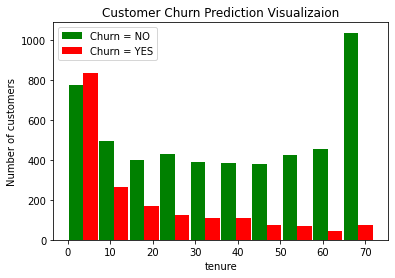

In [35]:
tenure_churn_no = df[df.Churn == "No"].tenure
tenure_churn_yes = df[df.Churn == "Yes"].tenure

plt.xlabel("tenure")
plt.ylabel("Number of customers")
plt.title("Customer Churn Prediction Visualizaion")

plt.hist([tenure_churn_no, tenure_churn_yes], rwidth= 0.95, color=["green", "red"], label=["Churn = NO","Churn = YES"])
plt.legend()

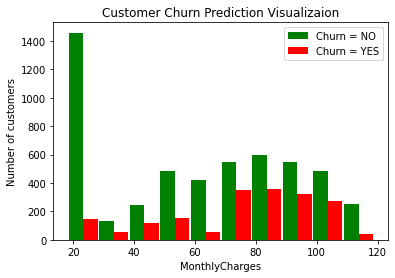

In [37]:
mc_churn_no = df[df.Churn == "No"].MonthlyCharges
mc_churn_yes = df[df.Churn == "Yes"].MonthlyCharges

plt.xlabel("MonthlyCharges")
plt.ylabel("Number of customers")
plt.title("Customer Churn Prediction Visualizaion")

plt.hist([mc_churn_no, mc_churn_yes], rwidth= 0.95, color=["green", "red"], label=["Churn = NO","Churn = YES"])
plt.legend()

In [42]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == "object":
            print(f'{column}:{df[column].unique()}')

In [43]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [44]:
df1.replace(["No internet service","No phone service"], "No", inplace = True)

C:\Python\lib\site-packages\pandas\core\frame.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [45]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [46]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({"Yes":1, "No":0},inplace = True)

C:\Python\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [47]:
print_unique_col_values(df1)

gender:['Female' 'Male']
InternetService:['DSL' 'Fiber optic' 'No']
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [50]:
for col in df1:
    print(f"{col}: {df1[col].unique()} ")

gender: ['Female' 'Male'] 
SeniorCitizen: [0 1] 
Partner: [1 0] 
Dependents: [0 1] 
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 
PhoneService: [0 1] 
MultipleLines: [0 1] 
InternetService: ['DSL' 'Fiber optic' 'No'] 
OnlineSecurity: [0 1] 
OnlineBackup: [1 0] 
DeviceProtection: [0 1] 
TechSupport: [0 1] 
StreamingTV: [0 1] 
StreamingMovies: [0 1] 
Contract: ['Month-to-month' 'One year' 'Two year'] 
PaperlessBilling: [1 0] 
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ] 
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ] 
Churn: [0 1] 


In [51]:
df1["gender"].replace({"Female":1, "Male":0}, inplace=True)

C:\Python\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [52]:
df1.gender.unique()

array([1, 0], dtype=int64)

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [62]:
# df['species']= label_encoder.fit_transform(df['species']) ['InternetService','Contract','PaymentMethod']
df1['InternetService'] = le.fit_transform(df1['InternetService'])
df1["Contract"] = le.fit_transform(df1["Contract"])
df1["PaymentMethod"] = le.fit_transform(df1["PaymentMethod"])

C:\Users\nikhi\AppData\Local\Temp/ipykernel_13872/578325294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['InternetService'] = le.fit_transform(df1['InternetService'])
C:\Users\nikhi\AppData\Local\Temp/ipykernel_13872/578325294.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Contract"] = le.fit_transform(df1["Contract"])
C:\Users\nikhi\AppData\Local\Temp/ipykernel_13872/578325294.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [63]:
for col in df1:
    print(f"{col}: {df1[col].unique()} ")

gender: [1 0] 
SeniorCitizen: [0 1] 
Partner: [1 0] 
Dependents: [0 1] 
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 
PhoneService: [0 1] 
MultipleLines: [0 1] 
InternetService: [0 1 2] 
OnlineSecurity: [0 1] 
OnlineBackup: [1 0] 
DeviceProtection: [0 1] 
TechSupport: [0 1] 
StreamingTV: [0 1] 
StreamingMovies: [0 1] 
Contract: [0 1 2] 
PaperlessBilling: [1 0] 
PaymentMethod: [2 3 0 1] 
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ] 
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ] 
Churn: [0 1] 


In [65]:
df1.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int32
PaperlessBilling      int64
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [68]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

C:\Python\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [69]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: [0 1 2]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtect

In [70]:
X = df1.drop("Churn", axis = 1)
y = df1["Churn"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [71]:
X_train.shape

(5625, 19)

In [72]:
X_test.shape

(1407, 19)

In [74]:
X_train.shape

(5625, 19)

In [75]:
X_train[:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5664,1,1,0,0,0.126761,1,0,1,0,0,1,0,0,1,0,1,1,0.660199,0.097709
101,1,0,1,1,0.000000,1,0,2,0,0,0,0,0,0,0,0,2,0.011940,0.000075
2621,0,0,1,0,0.985915,1,0,0,0,1,1,1,1,1,2,1,1,0.605473,0.639978
392,1,1,0,0,0.014085,1,0,0,0,0,0,0,0,0,0,1,2,0.259204,0.008135
1327,0,0,1,0,0.816901,1,1,1,0,0,1,0,1,1,1,1,0,0.808458,0.685703


In [76]:
import tensorflow as tf
from tensorflow import keras

In [80]:
model = keras.Sequential([
    keras.layers.Dense(19, input_shape = (19,), activation = "relu"),
    keras.layers.Dense(10, activation = "relu"),
    keras.layers.Dense(1, activation = "sigmoid")
])

model.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = ["accuracy"]
             )
model.fit(X_train, y_train, epochs = 100)

Epoch 1/150
176/176 [==============================] - 0s 1ms/step - loss: 0.5231 - accuracy: 0.7298
Epoch 2/150
176/176 [==============================] - 0s 1ms/step - loss: 0.4338 - accuracy: 0.7876
Epoch 3/150
176/176 [==============================] - 0s 1ms/step - loss: 0.4222 - accuracy: 0.7950
Epoch 4/150
176/176 [==============================] - 0s 1ms/step - loss: 0.4193 - accuracy: 0.8007
Epoch 5/150
176/176 [==============================] - 0s 1ms/step - loss: 0.4171 - accuracy: 0.8005
Epoch 6/150
176/176 [==============================] - 0s 1ms/step - loss: 0.4153 - accuracy: 0.8014
Epoch 7/150
176/176 [==============================] - 0s 1ms/step - loss: 0.4145 - accuracy: 0.8016
Epoch 8/150
176/176 [==============================] - 0s 1ms/step - loss: 0.4124 - accuracy: 0.8043
Epoch 9/150
176/176 [==============================] - 0s 1ms/step - loss: 0.4113 - accuracy: 0.8046
Epoch 10/150
176/176 [==============================] - 0s 1ms/step - loss: 0.4108 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.3790 - accuracy: 0.8220
Epoch 82/150
176/176 [==============================] - 0s 1ms/step - loss: 0.3792 - accuracy: 0.8217
Epoch 83/150
176/176 [==============================] - 0s 1ms/step - loss: 0.3785 - accuracy: 0.8183
Epoch 84/150
176/176 [==============================] - 0s 1ms/step - loss: 0.3784 - accuracy: 0.8219
Epoch 85/150
176/176 [==============================] - 0s 1ms/step - loss: 0.3778 - accuracy: 0.8213
Epoch 86/150
176/176 [==============================] - 0s 1ms/step - loss: 0.3778 - accuracy: 0.8254
Epoch 87/150
176/176 [==============================] - 0s 1ms/step - loss: 0.3774 - accuracy: 0.8224
Epoch 88/150
176/176 [==============================] - 0s 1ms/step - loss: 0.3773 - accuracy: 0.8222
Epoch 89/150
176/176 [==============================] - 0s 1ms/step - loss: 0.3782 - accuracy: 0.8208
Epoch 90/150
176/176 [==============================] - 0s 1ms/step - loss: 0.3765 - accuracy: 

In [81]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 814us/step - loss: 0.4773 - accuracy: 0.7783


[0.4773234724998474, 0.778251588344574]

In [82]:
yp = model.predict(X_test)
yp[:5]

array([[2.6973820e-01],
       [5.3727859e-01],
       [5.5652857e-04],
       [8.5475111e-01],
       [4.6432492e-01]], dtype=float32)

In [83]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [84]:
y_pred[:10]


[0, 1, 0, 1, 0, 1, 0, 1, 0, 0]

In [85]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [86]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       999
           1       0.65      0.52      0.58       408

    accuracy                           0.78      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



Text(69.0, 0.5, 'Truth')

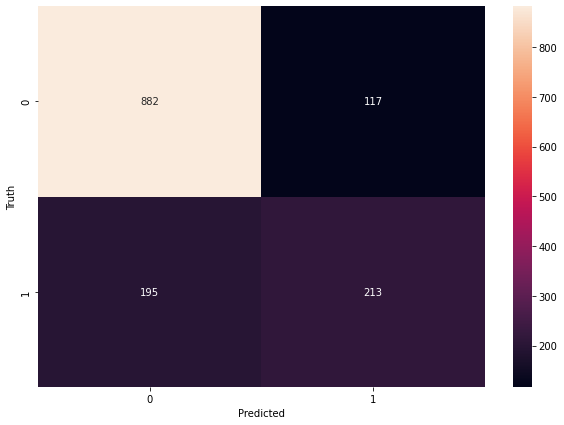

In [87]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')